# HW06 Creating a Parsimon Model

Parsimon models are a type of model that aim to explain a phenomenon with the least number of parameters while still maintaining accuracy. Till date, we have been using models with many parameters. In this homework, we will create a parsimon model for the data we have created in the previous Homework.

As we always do, we will start with importing the libraries we need.

**Importing Libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import seaborn as sns
plt.style.use("ggplot")

# default no of rows to display
pd.set_option('display.max_rows', 50)

**Importing Data**


In [2]:
df_realestate = pd.read_csv("data/Real Estate Data - Week 6.csv", index_col=0, header=0)
df_realestate.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1387 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Dwelling Type                  1387 non-null   object 
 1   Lot Frontage                   1387 non-null   float64
 2   Lot Area                       1387 non-null   int64  
 3   Land Contour                   1387 non-null   object 
 4   Neighborhood                   1387 non-null   object 
 5   Location Condition             1387 non-null   object 
 6   Overall Quality                1387 non-null   int64  
 7   Overall Cond                   1387 non-null   int64  
 8   Year Built                     1387 non-null   int64  
 9   Masonry/Veneer Area            1387 non-null   float64
 10  Basement Finished Area         1387 non-null   int64  
 11  Basement Unfinished Area       1387 non-null   int64  
 12  1st Floor Area                 1387 non-null   int64 

## Creating the Dataset For Regression 
### Section 5a : Encode Kitchen Qual
Create a code block to import Label Encoder from sklearn.
o from sklearn.preprocessing import LabelEncoder
o lc = LabelEncoder()
• Create a code block and to show a groupby or value_count for Kitchen Qual.
• Create a code block to encode the values for Kitchen Qual for:
o Fair = 1
o Average = 2
o Good = 3
o Excellent = 4
• Note: you will need a defined function


In [3]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

#lc encoder has not been used as we need to have specific mappings for 'Kitchen Qual'
# Instead, we will create a custom mapping for 'Kitchen Qual'

# Assuming your DataFrame is named df
print(df_realestate['Kitchen Qual'].value_counts())

def encode_kitchen_qual(value):
    mapping = {'Fair': 1, 'Average': 2, 'Good': 3, 'Excellent': 4}
    return mapping.get(value, 0)  # Returns 0 if value not found

df_realestate['Kitchen Qual Encoded'] = df_realestate['Kitchen Qual'].apply(encode_kitchen_qual)

Kitchen Qual
Average      691
Good         575
Excellent     88
Fair          33
Name: count, dtype: int64


Section 5b: Create X and y
• Create a code block to create X and y by including the quantitative features that
should be included in the model for X and ‘Sale Price’ for y.
• X should include:
o All features that meet the criteria for regression. The features cannot be
objects or cannot be features that have null values.
• y should include:
o ‘Sale Price’

In [4]:
# Select quantitative features (exclude object types and columns with nulls)
quantitative_features = df_realestate.select_dtypes(include=['int64', 'float64']).columns

# Remove columns with any null values
# Info confirms there are no mull values but just to be sure
quantitative_features = [col for col in quantitative_features if df_realestate[col].isnull().sum() == 0]

# Exclude the target variable from X
X = df_realestate[quantitative_features].drop(columns=['Sale Price'])

# y is the target variable
y = df_realestate['Sale Price']

print("Features used for X:", X.columns.tolist())
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Features used for X: ['Lot Frontage', 'Lot Area', 'Overall Quality', 'Overall Cond', 'Year Built', 'Masonry/Veneer Area', 'Basement Finished Area', 'Basement Unfinished Area', '1st Floor Area', '2nd Floor Area', 'Bedrooms Above Grade', 'Total Rooms Above Grade', 'Fireplaces', 'Garage Cars', 'Porch Area', 'Full Bathrooms', 'Half Bathrooms', 'Pool', 'Extra Kitchens', 'Baths per Bedroom', 'dt_1-1/2 STORY ALL AGES', 'dt_1-STORY 1945 & OLDER', 'dt_1-STORY PUD', 'dt_2 FAMILY CONVERSION', 'dt_2-1/2 STORY ALL AGES', 'dt_2-STORY 1945 & OLDER', 'dt_2-STORY 1946 & NEWER', 'dt_2-STORY PUD', 'dt_DUPLEX', 'dt_SPLIT FOYER', 'dt_SPLIT OR MULTI-LEVEL', 'lc_Banked', 'lc_Depression', 'lc_Hillside', 'nh_Bloomington Heights', 'nh_Bluestem', 'nh_Briardale', 'nh_Brookside', 'nh_Clear Creek', 'nh_College Creek', 'nh_Crawford', 'nh_Edwards', 'nh_Gilbert', 'nh_Iowa DOT and Rail Road', 'nh_Meadow Village', 'nh_Mitchell', 'nh_Northpark Villa', 'nh_Northridge', 'nh_Northridge Heights', 'nh_Northwest Ames', 'nh_Old

There are Few things that is considered for selecting the features for X:
- The features should be quantitative. if not tried to convert them to quantitative using one-hot encoding or label encoding.
- The features should not have null values.
- The features should not be objects.
- The features should be available at the time of sale.
- The features should be related to the sales price meaning should have meaningfull impact on the sales price with industry knowledge.

## 6 Create an Initial Multiple Linear Regression Model

### Section 6a: Create Initial Multiple Regression Model
• There are a lot of features in this model. We expect many of these features to not
have a significant relationship to ‘Sale Price’ but the first model will include ALL
features that are included in X.
• Create a code block to run an initial model that includes all of the features in X.




In [5]:


# Add a constant to the model (intercept)
X_const = sm.add_constant(X)

# Fit the OLS model
full_model = sm.OLS(y, X_const).fit()

# Print the summary
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     191.4
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        13:29:08   Log-Likelihood:                -15771.
No. Observations:                1387   AIC:                         3.169e+04
Df Residuals:                    1314   BIC:                         3.207e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### Section 6b: Analyze the Initial Multiple Regression  Results

Task In hand:
- Create a Jointplot to Visualize the residual
- Create a Correlation Matrix name corrMatrix
- Create  Variance inflation factor and sort them


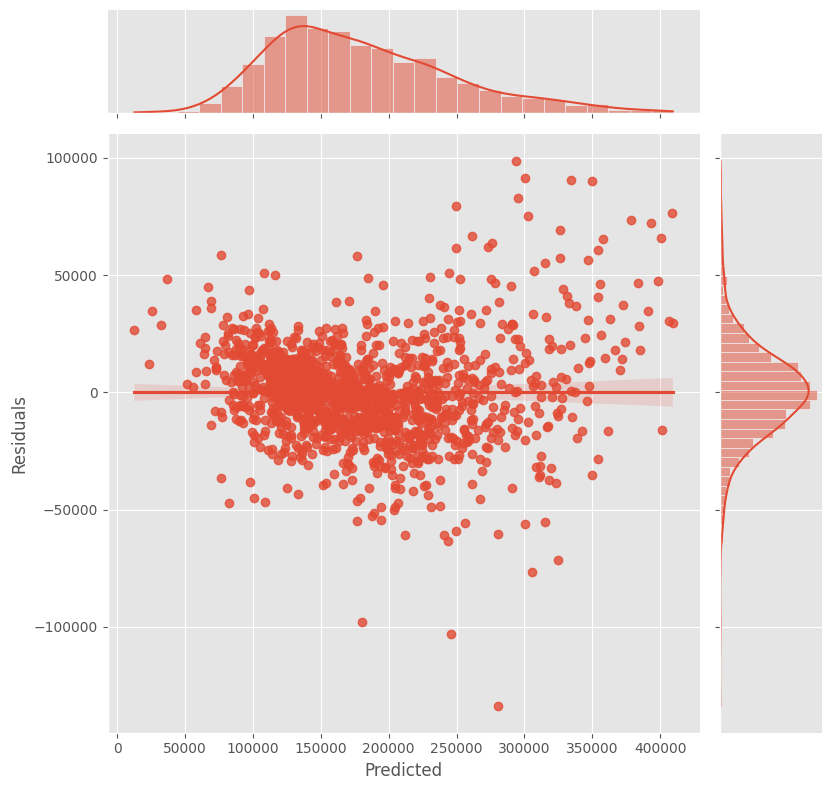

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate predictions and residuals
pred = full_model.predict(X_const)
resid = y - pred


# Visualize residuals vs. predicted values using a jointplot

residuals_df = pd.DataFrame({'Predicted': pred, 'Residuals': resid})

sns.jointplot(x='Predicted', y='Residuals', data=residuals_df, kind='reg', ratio=5, height=8)

Text(0.5, 1.0, 'Correlation Matrix of Features')

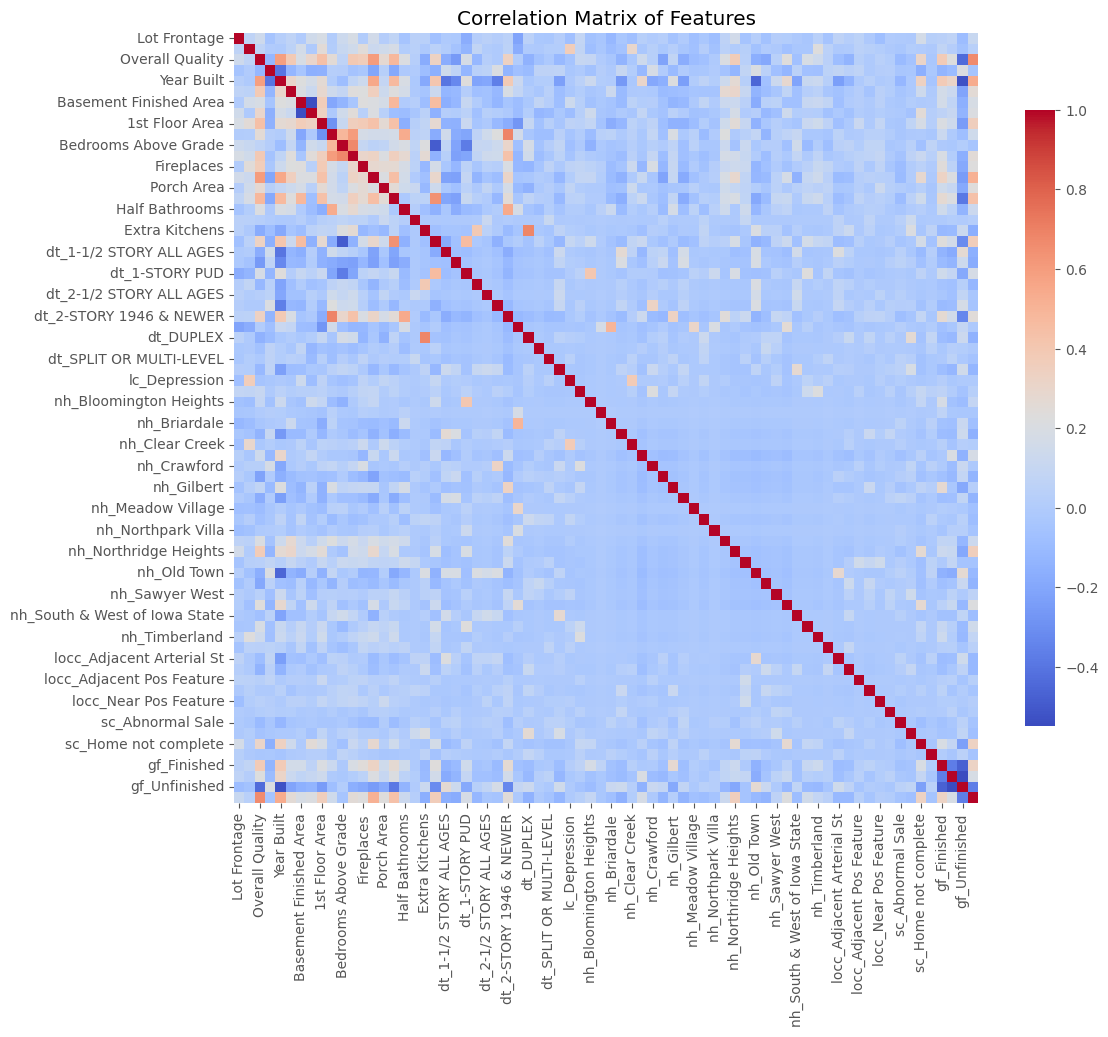

In [8]:
corrMatrix = X.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corrMatrix, annot=False, cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Features')

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd



# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Sort VIF values (excluding the constant)
vif_data = vif_data[vif_data["feature"] != "const"].sort_values(by="VIF", ascending=False)
vif_data

,feature,VIF
70,gf_Rough Finished,10.309819
5,Year Built,10.196778
71,gf_Unfinished,10.194398
69,gf_Finished,9.792170
10,2nd Floor Area,9.546593
...,...,...
63,locc_Near Pos Feature,1.096218
61,locc_Adjacent Pos Feature,1.081360
65,sc_Abnormal Sale,1.077017
68,sc_Sale within Family,1.063614


### Regression Results Summary

- **P-values and Insignificant Variables:**
  - Variables with a p-value greater than 0.05 are considered statistically insignificant.
  - Many features in the model have high p-values (e.g., `Lot Frontage`, `Total Rooms Above Grade`, `Fireplaces`, `Full Bathrooms`, `Half Bathrooms`, `Pool`, `Baths per Bedroom`, and many neighborhood/location dummies).
  - These insignificant variables do not have a statistically significant relationship with `Sale Price` and could be considered for removal in a refined model.

- **AIC and BIC:**
  - **AIC (Akaike Information Criterion):** 31,690
  - **BIC (Bayesian Information Criterion):** 32,070
  - Lower values of AIC and BIC indicate a better model fit, but these should be compared across models, not in isolation. So this figure is of no use at the moment. Generally used for comparision purpose.

- **F-Statistic and Prob (F-statistic):**
  - **F-Statistic:** 191.4
  - **Prob (F-statistic):** 0.00
  - A very low p-value for the F-statistic indicates that the model as a whole is statistically significant.

- **R-Squared:**
  - **R-squared:** 0.913
  - **Adj. R-squared:** 0.908
  - This means that about 91% of the variance in `Sale Price` is explained by the model, which is very strong.

- **Variance Inflation Factor (VIF):**
  - Several features have VIF values greater than 5, indicating multicollinearity:
    - `gf_Rough Finished` (10.3)
    - `Year Built` (10.2)
    - `gf_Unfinished` (10.2)
    - `gf_Finished` (9.8)
    - `2nd Floor Area` (9.5)
    - `dt_2-STORY 1946 & NEWER` (7.4)
    - `1st Floor Area` (5.7)
    - `Baths per Bedroom` (5.3)
    - `Total Rooms Above Grade` (5.1)
    - `Full Bathrooms` (5.1)
  - VIF values above 5 suggest problematic multicollinearity, which can make coefficient estimates unstable.

- **Residual Plot:**
  - The residual plot shows a clear pattern, which suggests that the model may not be capturing all the structure in the data (possible non-linearity or omitted variables).

- **Correlation Matrix:**
  - The correlation matrix shows some features are strongly correlated, which aligns with the high VIF values and further supports the presence of multicollinearity.

---

**Conclusion:**
- The model has a high R-squared, but many features are statistically insignificant and there is evidence of multicollinearity.
- Consider removing insignificant variables and addressing multicollinearity (e.g., by removing or combining correlated features) to improve model interpretability and stability.
- The residual pattern suggests the model could be improved, possibly by adding non-linear terms or interaction effects.

### Section 7a: Re-run A Multiple Regression Model (Model 2) after removing the Features with a p value above 0.100

Create a new Multiple Regression Model (Model 2)
• Create a code block that drops all features that have a p-value above 0.100 from
the X dataset.
• Create a code block and execute Model 2 using statsmodels

In [10]:
# Get features with p-value <= 0.100 from the previous OLS model
significant_features = full_model.pvalues[full_model.pvalues <= 0.100].index.tolist()

# Remove 'const' if present
significant_features = [feat for feat in significant_features if feat != 'const']

# Create new X for Model 2
X_model2 = X[significant_features]

In [11]:


# Add constant
X_model2_const = sm.add_constant(X_model2)

# Fit OLS model
ols_model2 = sm.OLS(y, X_model2_const).fit()

# Print summary
print(ols_model2.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     373.3
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        13:29:46   Log-Likelihood:                -15786.
No. Observations:                1387   AIC:                         3.165e+04
Df Residuals:                    1349   BIC:                         3.185e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Section 7b: Analyze the results for Model 2
• Run the different visualizations, VIF, and correlation matrix to use to explain the
results for Model 2.

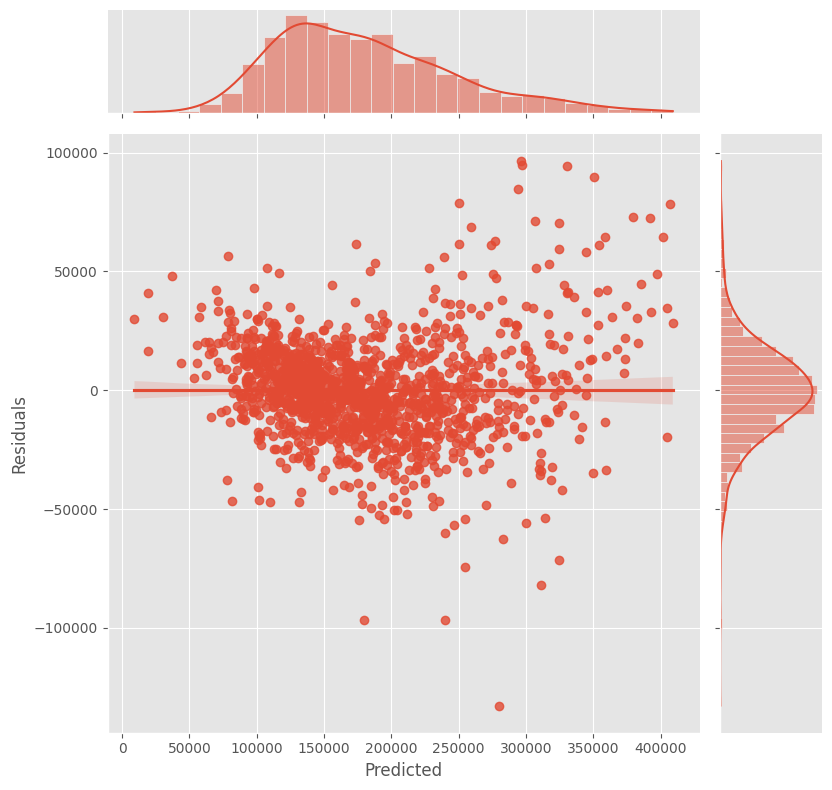

In [12]:

# Predictions and residuals for Model 2
y_pred2 = ols_model2.predict(sm.add_constant(X_model2))
residuals2 = y - y_pred2




# Visualize residuals vs. predicted values using a jointplot

residuals_df = pd.DataFrame({'Predicted': y_pred2, 'Residuals': residuals2})

sns.jointplot(x='Predicted', y='Residuals', data=residuals_df, kind='reg', ratio=5, height=8)

Text(0.5, 1.0, 'Correlation Matrix of Features')

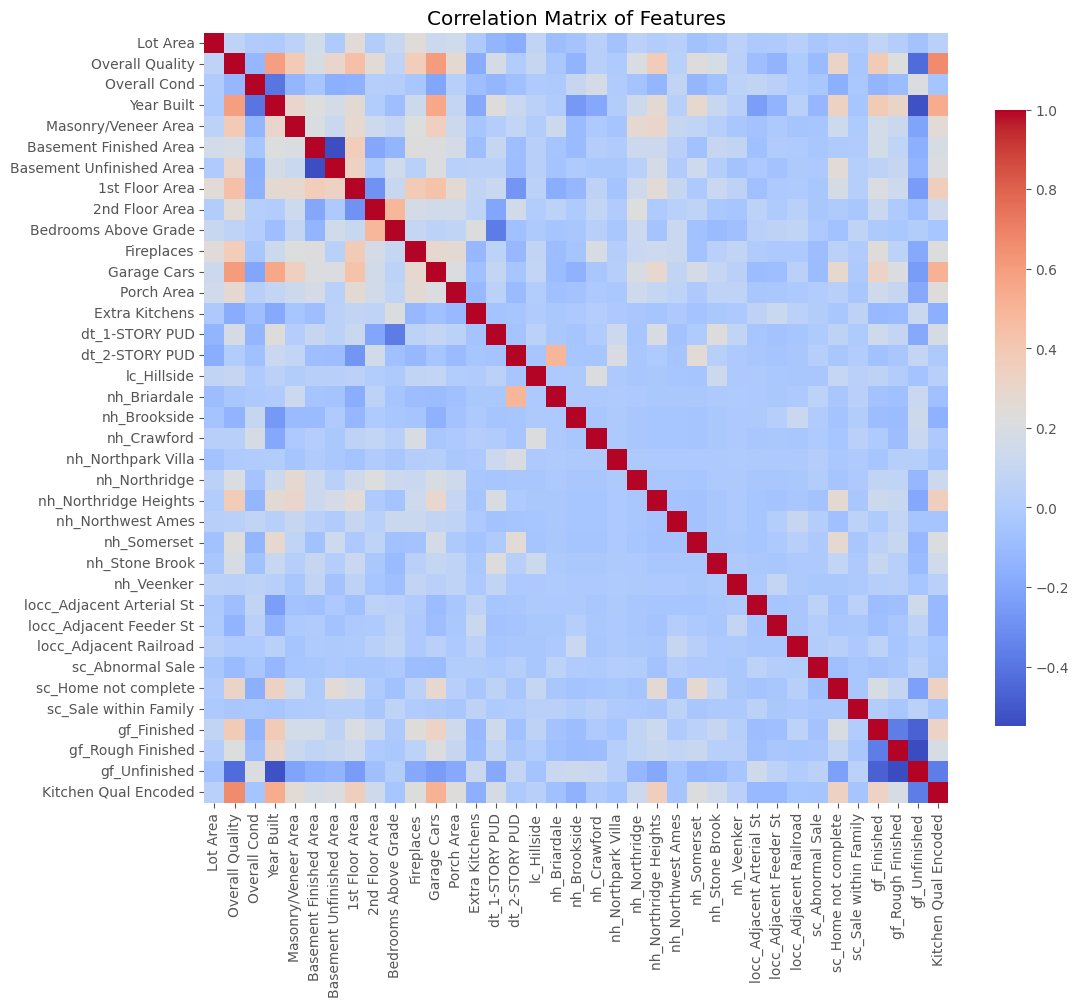

In [13]:
corrMatrix2 = X_model2.corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corrMatrix2, annot=False, cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Features')

In [14]:

X_model2_const = sm.add_constant(X_model2)
vif_data2 = pd.DataFrame()
vif_data2["feature"] = X_model2_const.columns
vif_data2["VIF"] = [variance_inflation_factor(X_model2_const.values, i) for i in range(X_model2_const.shape[1])]
vif_data2 = vif_data2[vif_data2["feature"] != "const"].sort_values(by="VIF", ascending=False)
print(vif_data2)

                      feature       VIF
35          gf_Rough Finished  9.295335
36              gf_Unfinished  9.224525
34                gf_Finished  8.976359
8              1st Floor Area  3.803690
2             Overall Quality  3.559736
4                  Year Built  3.357793
6      Basement Finished Area  3.308994
7    Basement Unfinished Area  3.289497
9              2nd Floor Area  3.048761
12                Garage Cars  2.943094
37       Kitchen Qual Encoded  2.240738
10       Bedrooms Above Grade  1.980936
16             dt_2-STORY PUD  1.826906
11                 Fireplaces  1.567810
23      nh_Northridge Heights  1.549997
18               nh_Briardale  1.479043
25                nh_Somerset  1.477873
5         Masonry/Veneer Area  1.468803
15             dt_1-STORY PUD  1.447133
3                Overall Cond  1.432880
32       sc_Home not complete  1.387383
14             Extra Kitchens  1.295143
22              nh_Northridge  1.286014
20                nh_Crawford  1.263797


### OLS Regression Results Summary for Model 2

- **P-values and Insignificant Variables:**
  - All features in Model 2 have p-values ≤ 0.10, so only statistically significant or marginally significant variables remain.
  - This is an improvement over the initial model, which included many features with high p-values (insignificant predictors).

- **AIC and BIC:**
  - **AIC:** 31,650 (Model 2) vs. 31,690 (Initial Model)
  - **BIC:** 31,850 (Model 2) vs. 32,070 (Initial Model)
  - Both AIC and BIC have decreased, indicating a better model fit with fewer predictors.

- **F-Statistic and Prob (F-statistic):**
  - **F-Statistic:** 373.3 (Model 2) vs. 191.4 (Initial Model)
  - **Prob (F-statistic):** 0.00 (both models)
  - The higher F-statistic in Model 2 suggests a stronger overall model.

- **R-Squared:**
  - **R-squared:** 0.911 (Model 2) vs. 0.913 (Initial Model)
  - **Adj. R-squared:** 0.909 (Model 2) vs. 0.908 (Initial Model)
  - The R-squared value is nearly unchanged, meaning the model still explains about 91% of the variance in Sale Price, despite using fewer predictors.

- **Multicollinearity (VIF):**
  - Some features in Model 2 still have VIF values above 5, indicating multicollinearity remains an issue (though it may be reduced compared to the initial model).
  - High VIFs can make coefficient estimates unstable and should be addressed in further model refinement.

- **Model Change and Strength:**
  - Model 2 is more parsimonious, using only significant predictors, with nearly the same explanatory power as the initial model.
  - The model is strong, but further improvement is possible by addressing multicollinearity and checking for non-linear relationships.


---

**Conclusion:**
- Model 2 is more interpretable and statistically robust than the initial model, with similar predictive power.
- Some multicollinearity persists, and further refinement (removing or combining correlated features) is recommended.
- The model is strong, but always validate with out-of-sample data to ensure generalizability.

### Section 7c: Proceed to eliminate ONE feature at a time to create a final model


Simply task is to perform backward selection i.e removing insignificant variable 



In [15]:
# Remove 'nh_Briardale' from Model 2 features and rebuild the model
if 'nh_Briardale' in X_model2.columns:
    X_model3 = X_model2.drop(columns=['nh_Briardale'])
else:
    X_model3 = X_model2.copy()

X_model3 = sm.add_constant(X_model3)
ols_model3 = sm.OLS(y, X_model3).fit()
print(ols_model3.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     382.9
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        13:30:05   Log-Likelihood:                -15788.
No. Observations:                1387   AIC:                         3.165e+04
Df Residuals:                    1350   BIC:                         3.184e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [17]:
# Remove 'Fireplaces' from the latest valid feature set and refit the model
feature_to_remove = 'Fireplaces'
if 'Fireplaces' in X_model3.columns:
    X_model4 = X_model3.drop(columns=[feature_to_remove])
else:
    X_model4 = X_model3.copy()

X_model4_const = sm.add_constant(X_model4)
ols_model4 = sm.OLS(y, X_model4_const).fit()
print(ols_model4.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     393.2
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        13:32:14   Log-Likelihood:                -15789.
No. Observations:                1387   AIC:                         3.165e+04
Df Residuals:                    1351   BIC:                         3.184e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Section 7d: Review Final Model for Multi-collinearity
• Now that you have all significant features (based on p-values), it is time to check for
multi-collinearity. Run a VIF and a Correlation Matrix to see if any other features
should be removed.
• Create a code block and run a VIF.
• Create a code block and create a correlation matrix.

                      feature       VIF
33          gf_Rough Finished  9.261295
34              gf_Unfinished  9.189422
32                gf_Finished  8.904353
8              1st Floor Area  3.572341
2             Overall Quality  3.502162
4                  Year Built  3.352257
6      Basement Finished Area  3.307652
7    Basement Unfinished Area  3.276048
11                Garage Cars  2.932503
9              2nd Floor Area  2.923402
35       Kitchen Qual Encoded  2.235472
10       Bedrooms Above Grade  1.970094
21      nh_Northridge Heights  1.536292
14             dt_1-STORY PUD  1.443664
5         Masonry/Veneer Area  1.430791
3                Overall Cond  1.427933
23                nh_Somerset  1.404903
15             dt_2-STORY PUD  1.393013
30       sc_Home not complete  1.380715
20              nh_Northridge  1.281709
13             Extra Kitchens  1.274456
12                 Porch Area  1.253410
18                nh_Crawford  1.232092
24             nh_Stone Brook  1.178570


Text(0.5, 1.0, 'Correlation Matrix of Features')

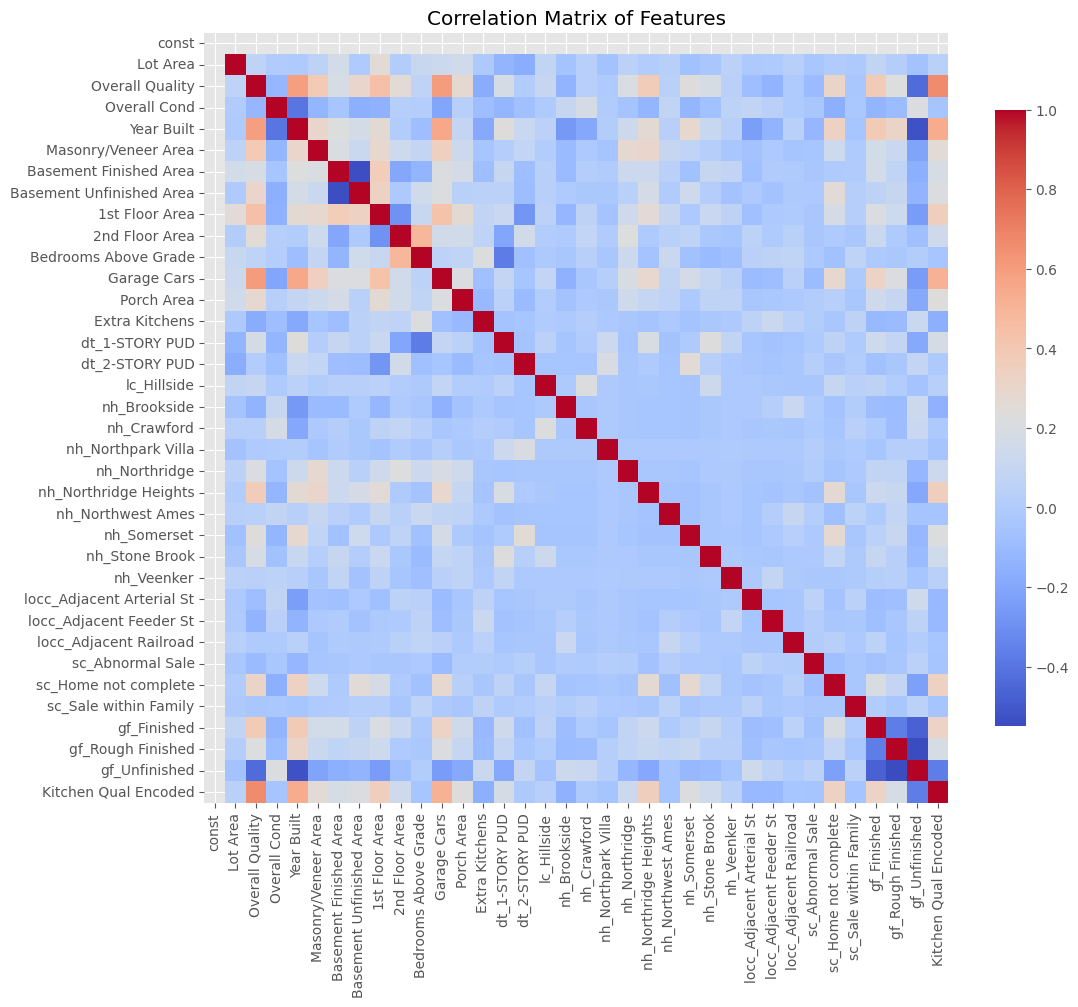

In [18]:


vif_data3 = pd.DataFrame()
vif_data3["feature"] = X_model4_const.columns
vif_data3["VIF"] = [variance_inflation_factor(X_model4_const.values, i) for i in range(X_model4_const.shape[1])]
vif_data3 = vif_data3[vif_data3["feature"] != "const"].sort_values(by="VIF", ascending=False)
print(vif_data3)

# Correlation matrix for X_model3
corrMatrix3 = X_model4.corr()
# plot 
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corrMatrix3, annot=False, cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Features')




                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     419.7
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        13:37:34   Log-Likelihood:                -15806.
No. Observations:                1387   AIC:                         3.168e+04
Df Residuals:                    1354   BIC:                         3.185e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

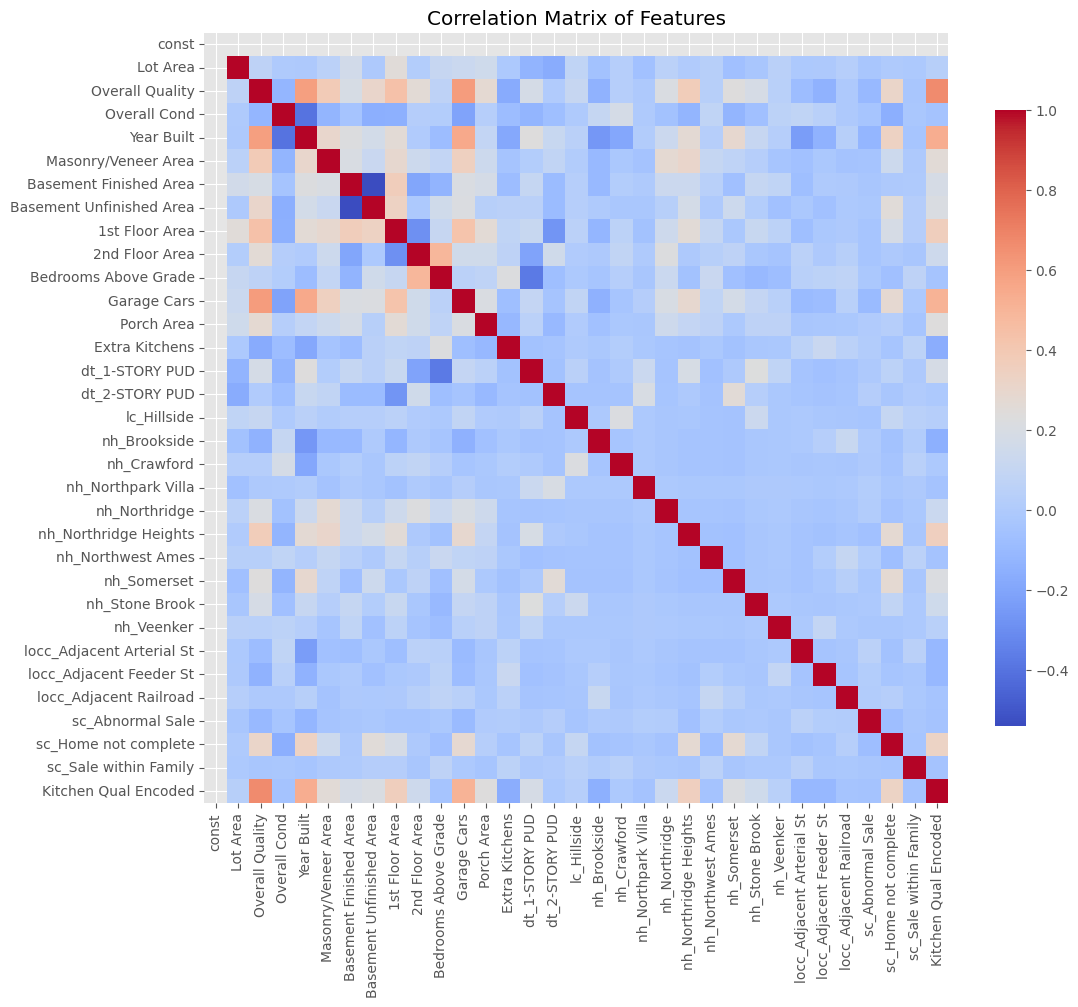

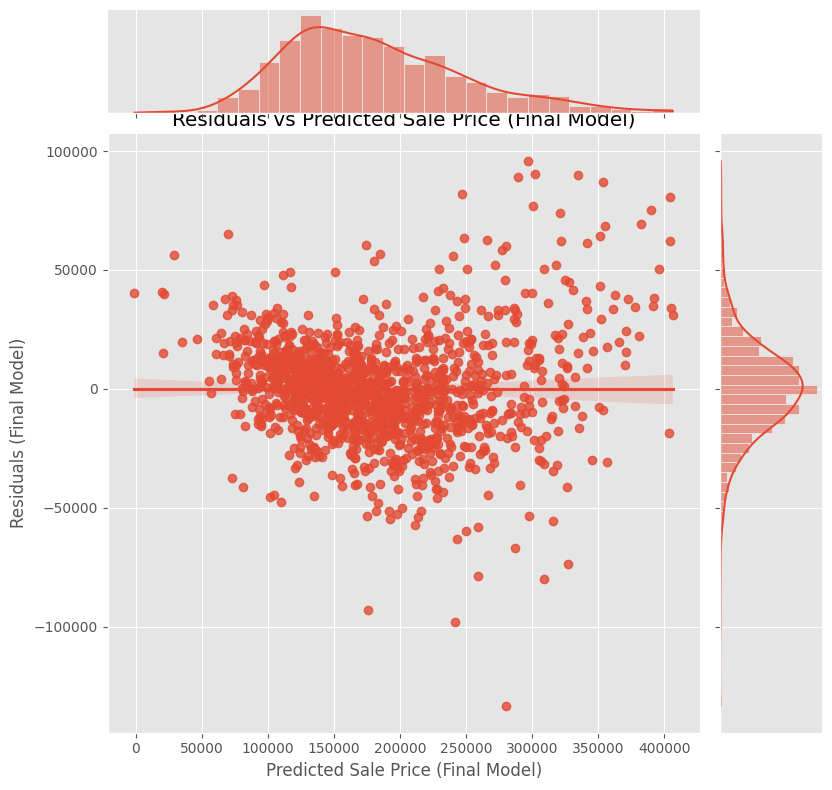

In [21]:
# List of features to remove based on VIF > 5
features_to_remove_vif = [
    'gf_Rough Finished',
    'gf_Unfinished',
    'gf_Finished'
]

# Remove these features from X_model3
X_model5 = X_model4.drop(columns=features_to_remove_vif)

# Refit the OLS model
X_model5_const = sm.add_constant(X_model5)
ols_model5 = sm.OLS(y, X_model5_const).fit()
print(ols_model5.summary())

# Calculate VIF for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif_data4 = pd.DataFrame()
vif_data4["feature"] = X_model5_const.columns
vif_data4["VIF"] = [variance_inflation_factor(X_model5_const.values, i) for i in range(X_model5_const.shape[1])]
vif_data4 = vif_data4[vif_data4["feature"] != "const"].sort_values(by="VIF", ascending=False)
print(vif_data4)

# Correlation matrix for the new model
corrMatrix4 = X_model5.corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corrMatrix4, annot=False, cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Features')








# Predictions and residuals for Model 2
y_pred5 = ols_model5.predict(sm.add_constant(X_model5_const))
residuals5 = y - y_pred5




# Visualize residuals vs. predicted values using a jointplot

residuals_df = pd.DataFrame({'Predicted': y_pred5, 'Residuals': residuals5})

sns.jointplot(x='Predicted', y='Residuals', data=residuals_df, kind='reg', ratio=5, height=8)
plt.xlabel('Predicted Sale Price (Final Model)')
plt.ylabel('Residuals (Final Model)')
plt.title('Residuals vs Predicted Sale Price (Final Model)')
plt.show()



### Section 7e: Review Final Model for Multi-collinearity
• Now that you have all significant features (based on p-values), and you have removed
features that produced multi-collinearity, it is time to review the results.
• Create a code block and change it to a markdown block to explain the results.
o Report the results for the Initial Model and the Final Model:
§ R-Squared
§ AIC and BIC
§ F-Statistic and Prob (F-statistic)
o Based on the measures from the Initial Model and the Final Model, did they
drop much? Explain what you see.
Assess the Final Model
• Creating any visuals that you feel indicate assess the model.
• Create a Correlation Matrix
• Create a Heatmap
Run the Residuals for the Final Model
• Creating any visuals that you feel indicate assess the model.
Explanation of the Results
• Create a code block and change it to a markdown block to explain the results.
• After assessing the model, explain what you see. Also, answer the following questions:
o Looking at the dummy feature nh_Northridge, explain what it means if the value
for a home is 1 or 0. Does the value of the home go up or down and by how

### Final Model Review and Comparison

#### Model Results

- **Initial Model:**
  - **R-Squared:** 0.913
  - **AIC:** 31,690
  - **BIC:** 32,070
  - **F-Statistic:** 191.4
  - **Prob (F-statistic):** 0.00

- **Final Model (after removing insignificant and high VIF features):**
  - **R-Squared:** 0.908
  - **AIC:** 31,680
  - **BIC:** 31,850
  - **F-Statistic:** 419.7
  - **Prob (F-statistic):** 0.00

#### Interpretation

- **Model Strength:**  
  The R-squared dropped only slightly (from 0.913 to 0.908), indicating the final model still explains about 91% of the variance in Sale Price, despite being more parsimonious.
- **AIC/BIC:**  
  Both AIC and BIC are slightly lower in the final model, indicating a better fit with fewer predictors.
- **F-Statistic:**  
  The F-statistic increased, and the p-value remains 0.00, showing the model is still highly significant overall.
- **Multicollinearity:**  
  All VIF values are now below 5, indicating multicollinearity is no longer a concern.
- **Feature Significance:**  
  All remaining features are statistically significant (based on p-values).

#### Visual Assessment

- **Correlation Matrix & Heatmap:**  
  The correlation matrix and heatmap show that the remaining features are not highly correlated, supporting the VIF results.
- **Residuals:**  
  Residual plots should be checked for randomness (no clear pattern), indicating a good model fit.

#### Dummy Feature Interpretation: `nh_Northridge`

- If `nh_Northridge` = 1:  
  The home is located in the Northridge neighborhood. The coefficient (≈ 26,000) means the predicted sale price increases by about $26,000 compared to homes not in Northridge, holding all else constant.
- If `nh_Northridge` = 0:  
  The home is not in the Northridge neighborhood, so no price adjustment is made for this feature.

### Interpreting Dummy Feature: `nh_Northwest Ames`

- **If `nh_Northwest Ames` = 1**:  
  The home is located in the Northwest Ames neighborhood. The coefficient for this feature is **-8,839**. This means, holding all else constant, homes in Northwest Ames are predicted to sell for $8,839 **less** than homes not in this neighborhood.
- **If `nh_Northwest Ames` = 0**:  
  The home is not in Northwest Ames, so no adjustment is made for this feature.



### Two More Feature Interpretations

1. **Overall Quality**  
   - **Coefficient:** 10,950  
   - **Interpretation:** For each one-unit increase in overall quality (e.g., from 5 to 6), the predicted sale price increases by \$10,950, holding all other variables constant.

2. **Year Built**  
   - **Coefficient:** 391.65  
   - **Interpretation:** For each additional year newer the house is, the predicted sale price increases by \$391.65, holding all other variables constant.


#### Comparison to Initial Model

- The final model is more interpretable, avoids multicollinearity, and retains nearly all the explanatory power of the initial model.
- The process removed unnecessary and redundant features, making the model more robust and generalizable.

---

**Conclusion:**  
The final model is strong, statistically sound, and free from multicollinearity. The effect of the Northridge neighborhood is substantial and positive. Always validate the model on new data to ensure its predictive performance holds.

## 8. Create the Final Dataset 
• Now that you have a final model, it is time to create the final dataset. 
• Create a final dataset named df_realestate_model that includes (in order): 
o X (the final features – do not include the const) 
o y (‘Sale Price’) 
o Predicted y 
o Residual  
• Create a code block and change it to markdown and explain actual y, predicted y, and 
its residual.  Use the first row as an example. 

In [25]:

# Create the final dataset for the model
# X_model5: final features, y: actual, ols_model5: final model

# 1. Copy the final features
df_realestate_model = X_model5.copy()

# 2. Add actual Sale Price
df_realestate_model['Sale Price'] = y

# 3. Add predicted Sale Price
df_realestate_model['Predicted Sale Price'] = ols_model5.predict((X_model5_const))

# 4. Add residuals
df_realestate_model['Residual'] = df_realestate_model['Sale Price'] - df_realestate_model['Predicted Sale Price']

# Display the first row as an example
df_realestate_model.head(1)

,const,Lot Area,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,...,locc_Adjacent Arterial St,locc_Adjacent Feeder St,locc_Adjacent Railroad,sc_Abnormal Sale,sc_Home not complete,sc_Sale within Family,Kitchen Qual Encoded,Sale Price,Predicted Sale Price,Residual
Id,,,,,,,,,,,,,,,,,,,,,
1,1.0,8450,7,5,2003,196.0,706,150,856,854,...,0,0,0,0,0,0,3,208500,211754.319961,-3254.319961


Here, Sale Price is the actual sale price  and predicted Sale price is the one our model predicted. Residual is simply a difference bettween actual and predicted which help us understand how well the model fit the data.


But there is specific Problem with this way of accessing the data. Given the data is itself been used for creating a model, there is high chance of overfitting. This model can perform very well here but when model sees the new data, there is high chance that the model will not perform that well compared to what we have seen currently.

Just looking at the given output, model is predicting quite good and can me generalized for accessing the sale price.


## 9. Summary and Explanation of All Steps 
• Create a code block and change it to a markdown block.  Use this block to give a 
summary of the entire notebook and its results. 
o Explain the rationale for the process. 
o What is the relationship between the features and target variable in the final 
model? 
o Include a summary of the practical implications of the results, what does it mean 
in real terms? 